## Download and install dependencies

In [1]:
!pip install yfinance numpy pandas matplotlib seaborn statsmodels scikit-learn pmdarima

  Using cached yfinance-0.2.64-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached curl_cffi-0.11.4-cp39-abi3-macosx_11_0_arm64.whl.metadata (14 kB)
  Using cached protobuf-6.31.1-cp39-abi3-macosx_10_9_universal2.whl.metadata (593 bytes)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.m

## Fetching Historical Stock Data

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker = 'AAPL'

# Fetch data
stock_data = yf.download(ticker, start='2015-01-01', end='2024-12-31')

# Display the first few rows
stock_data.head()


/var/folders/w1/bxbnvr7j1yv23_8kgp0p99840000gn/T/ipykernel_10858/813105295.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288586,24.757340,23.848711,24.746232,212818400
2015-01-05,23.604334,24.137514,23.417722,24.057537,257142000
2015-01-06,23.606546,23.866471,23.244427,23.668750,263188400
2015-01-07,23.937574,24.037545,23.704307,23.815387,160423600
2015-01-08,24.857300,24.915061,24.148614,24.266359,237458000


In [3]:
# Check data types
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2015-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2515 non-null   float64
 1   (High, AAPL)    2515 non-null   float64
 2   (Low, AAPL)     2515 non-null   float64
 3   (Open, AAPL)    2515 non-null   float64
 4   (Volume, AAPL)  2515 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [4]:
# Summary statistics
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,93.994613,94.907267,92.978800,93.906769,1.171176e+08
std,65.518476,66.112100,64.829414,65.435983,6.839566e+07
min,20.647459,20.951435,20.448619,20.569752,2.323470e+07
25%,35.277458,35.681954,34.917543,35.308430,7.108210e+07
50%,64.509293,64.859477,63.698900,64.267085,1.003845e+08
75%,150.536003,152.267283,148.515871,150.317857,1.426222e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


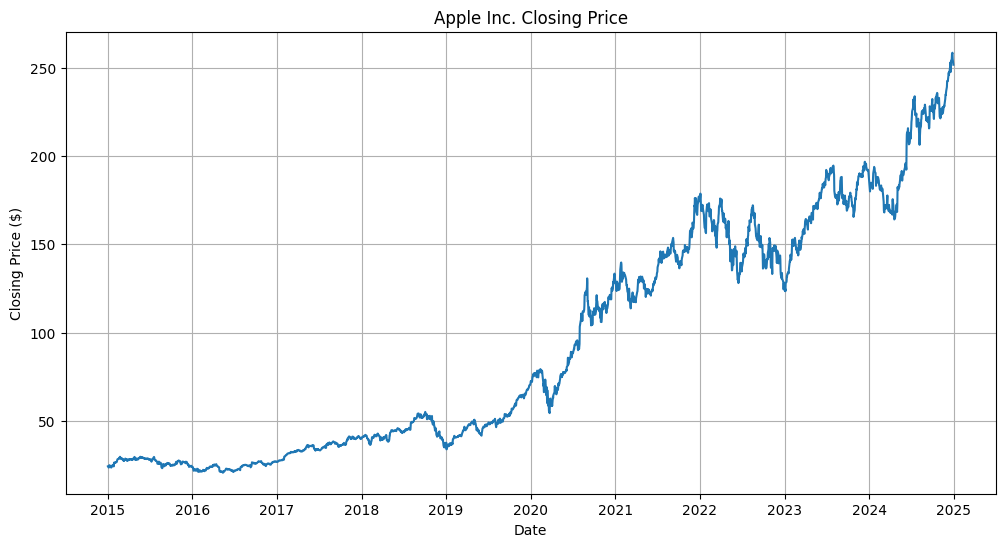

In [5]:
import matplotlib.pyplot as plt

# Plot closing price
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'])
plt.title('Apple Inc. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()


In [6]:
# Check for missing values
print(stock_data.isnull().sum())

# Fill missing values if any
stock_data.fillna(method='ffill', inplace=True)


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


/var/folders/w1/bxbnvr7j1yv23_8kgp0p99840000gn/T/ipykernel_10858/2648290597.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


## Data Transformation

Here we are applying log transformation to stabilize variance.

⚡ What Does “Stabilize Variance” Mean?
When your data has heteroscedasticity (i.e., the variance changes across levels of the data), it can violate assumptions in many statistical models, like linear regression or ARIMA.

📉 What Does a Log Transformation Do?
A log transformation compresses large values more than small values. This:

1. Reduces skewness
2. Brings out smaller patterns in large-range data
3. Flattens exponential trends
4. Makes variance more uniform

🧪 When Should You Apply Log Transform?

1. Data is right-skewed (e.g., incomes, sales, counts)
2. Variance increases with the mean
3. You're modeling with algorithms that assume constant variance (e.g., linear regression, ARIMA)

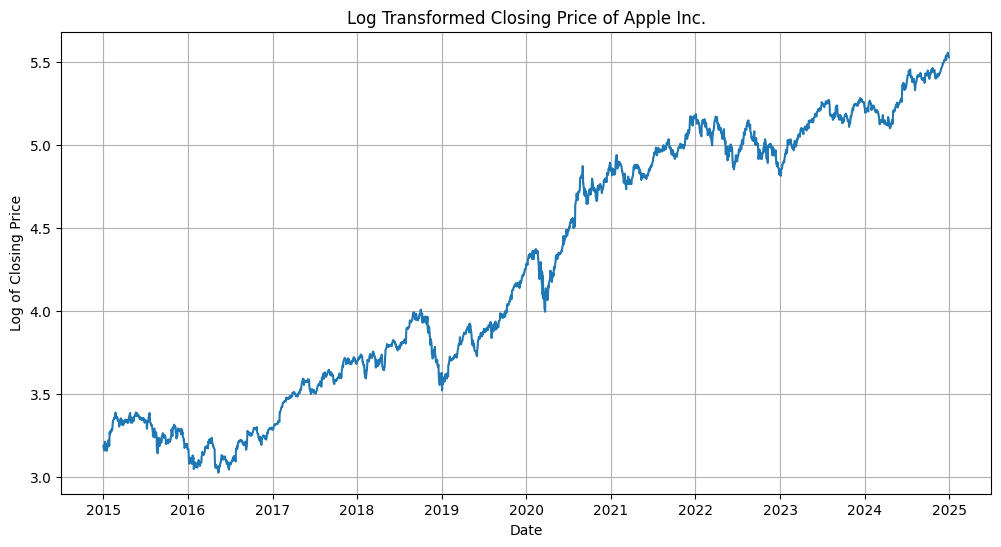

In [7]:
import numpy as np

# Extract 'Close' price
df_close = stock_data['Close']

# Apply log transformation
df_log = np.log(df_close)

# Plot the transformed data
plt.figure(figsize=(12,6))
plt.plot(df_log)
plt.title('Log Transformed Closing Price of Apple Inc.')
plt.xlabel('Date')
plt.ylabel('Log of Closing Price')
plt.grid(True)
plt.show()

## Exploratory Data Analysis

In [8]:
df_close.describe()

Ticker,AAPL
count,2515.000000
mean,93.994613
std,65.518476
min,20.647459
25%,35.277458
50%,64.509293
75%,150.536003
max,258.396667


### Density plot

We will now plot the distribution to understand the skewness and kurtosis.

📊 It Plots a Kernel Density Estimate (KDE)
This line `df_close.plot(kind='kde')` generates a KDE plot — a smooth curve that estimates the probability density function (PDF) of a continuous variable (in this case, df_close)

<Figure size 1200x600 with 0 Axes>

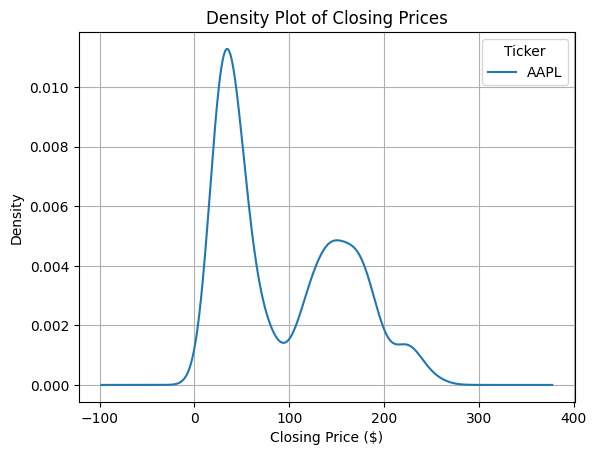

In [9]:
# Density plot
plt.figure(figsize=(12,6))
df_close.plot(kind='kde')
plt.title('Density Plot of Closing Prices')
plt.xlabel('Closing Price ($)')
plt.grid(True)
plt.show()


## Decomposing Time Series

This is done to observe trend and seasonality.

---

### 🔁 What Does It Do?

`seasonal_decompose()` performs **classical time series decomposition**. It breaks a time series into:

1. **Trend**: The long-term progression of the series
2. **Seasonality**: Repeating patterns at a fixed frequency
3. **Residual**: What's left after removing trend and seasonality (aka "noise")

---

### 🔍 Two Model Types

1. **Additive** model:

   $$
   y_t = T_t + S_t + R_t
   $$
2. **Multiplicative** model:

   $$
   y_t = T_t \times S_t \times R_t
   $$

You choose the model type with the `model` parameter.

> Multiplicative is better when seasonal variation grows with the trend
> Additive is better when variation is constant across the series

---

## ⚙️ Step-by-Step Mechanics

Let’s go through the decomposition logic.

### 1. **Estimate Trend (Tₜ)**

* Uses **moving average smoothing** to isolate the trend.
* Specifically, a **centered moving average** over the specified `period`.

If `period=252`, it computes a moving average over 252 values to smooth out seasonality and noise.

```text
trend_t = rolling_mean(y_t, window=252)
```

This yields a smoothed version of the series.

---

### 2. **Detrend the Series**

Next, we remove the trend to isolate the seasonality.

* For **additive**:

  $$
  y_t - T_t = S_t + R_t
  $$
* For **multiplicative**:

  $$
  \frac{y_t}{T_t} = S_t \times R_t
  $$

---

### 3. **Estimate Seasonality (Sₜ)**

* After detrending, the algorithm:

  * Groups the detrended data by position within the cycle (e.g., day 1, day 2, ..., day 252)
  * Takes the **average value for each position** to estimate seasonal effects

For example, for `period=252`:

* It averages all values from "day 1 of the cycle", then "day 2", and so on...
* This builds a seasonal profile of size 252.

---

### 4. **Calculate Residual (Rₜ)**

Once you have `T_t` and `S_t`, the residual is:

* **Additive**:

  $$
  R_t = y_t - T_t - S_t
  $$
* **Multiplicative**:

  $$
  R_t = \frac{y_t}{T_t \times S_t}
  $$

This captures the irregularities not explained by trend or seasonality.

---

### 🧠 Important Assumptions

* **Periodicity is known and fixed** (e.g., 252 trading days per year)
* **Seasonality is consistent** (doesn't change over time)
* **Trend is slow-changing**, so a moving average can extract it
* **Data is evenly spaced**

---

### ⛔ Limitations

* It **cannot handle missing dates**
* It doesn't handle **non-constant seasonality** (you’d use `STL` or `Prophet` for that)
* It’s a **deterministic** method (not probabilistic)

---

### 🧪 TL;DR

`seasonal_decompose()`:

* Uses moving averages to get trend
* Uses averaging across cycles to get seasonality
* Leaves the rest as residuals
* Works best when your data is stable, regular, and has a clear seasonal pattern



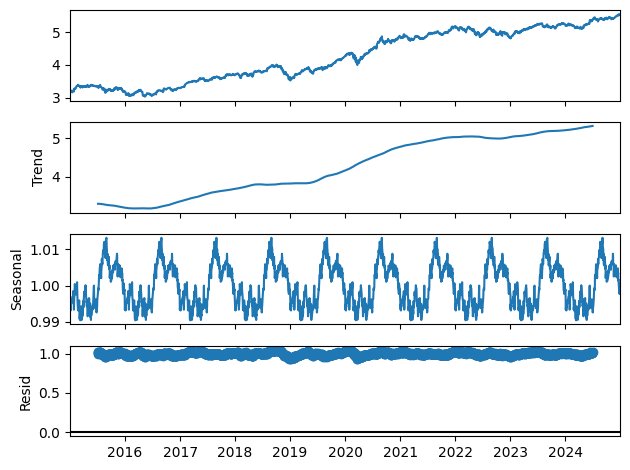

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_log, model='multiplicative', period=252)  # Approximate trading days in a year

# Plot decomposition
result.plot()
plt.show()


## Stationarity



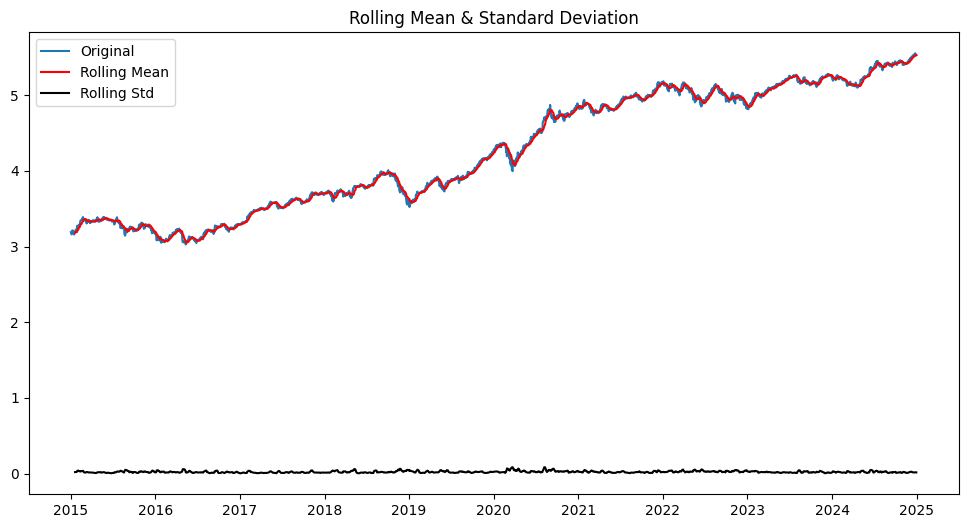

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -0.289011
p-value                           0.927046
#Lags Used                        9.000000
Number of Observations Used    2505.000000
Critical Value (1%)              -3.432963
Critical Value (5%)              -2.862694
Critical Value (10%)             -2.567385
dtype: float64


In [11]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12,6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform ADF test
    print('Results of Augmented Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)

# Test stationarity
test_stationarity(df_log)


9.3 Differencing to Achieve Stationarity

If the series is non-stationary, apply differencing.



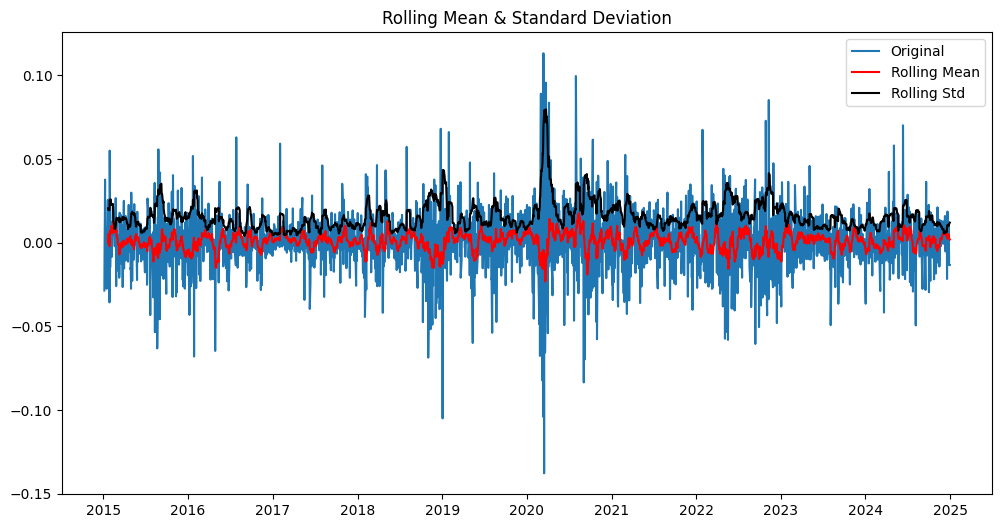

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.554769e+01
p-value                        2.119555e-28
#Lags Used                     8.000000e+00
Number of Observations Used    2.505000e+03
Critical Value (1%)           -3.432963e+00
Critical Value (5%)           -2.862694e+00
Critical Value (10%)          -2.567385e+00
dtype: float64


In [12]:

# Differencing
df_log_diff = df_log.diff().dropna()

# Test stationarity again
test_stationarity(df_log_diff)

10. Module 6: Determining ARIMA Parameters

10.1 Autocorrelation and Partial Autocorrelation Plots
Plot ACF and PACF to identify potential values of p and q.


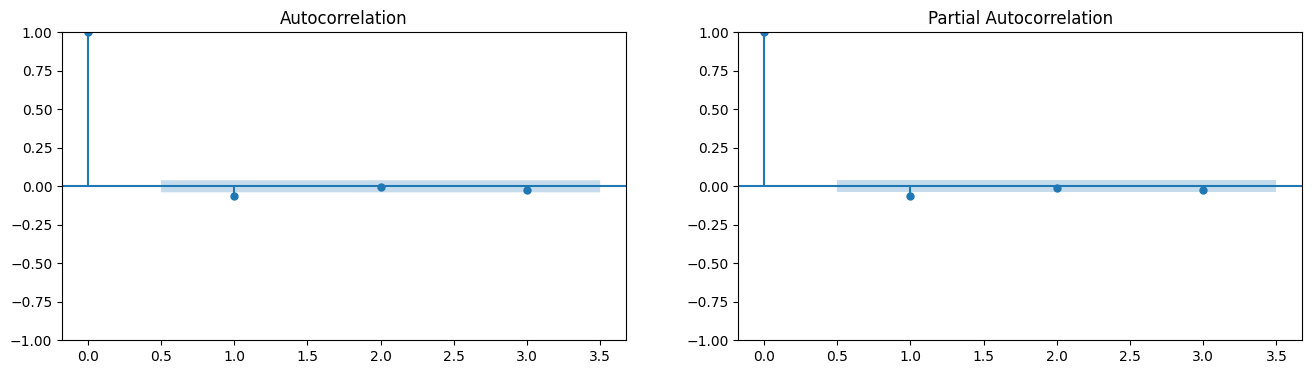

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df_log_diff, lags=3, ax=axes[0])
plot_pacf(df_log_diff, lags=3, ax=axes[1])
plt.show()


10.2 Using Auto ARIMA to Find Optimal Parameters

### 🧠 Intuition: What is ARIMA?

ARIMA is a statistical model used to forecast future values in a time series by modeling its own past values and past errors.

AR (AutoRegressive): Use past values to predict the current value.
I (Integrated): Remove trend/non-stationarity by differencing the data.
MA (Moving Average): Use past error terms to correct future predictions.

#### 📌 First Principles Breakdown

##### 1. Stationarity: The Foundation
Most real-world data is not stationary. That's where the Integrated (I) part comes in — differencing to make it stationary.
##### 2. Differencing (I): Making Series Stationary
This is the "I" in ARIMA — the order of differencing is denoted by d in ARIMA(p, d, q).
##### 3. Autoregression (AR)
After differencing, suppose the series is stationary. Then we can model it as a linear combination of its own past values:
p is the AR order - This is the "AR(p)" part.
##### 4. Moving Average (MA)
Instead of just modeling the value based on past values, we can also model it using past errors:
q is the MA order - This is the "MA(q)" part.
##### 5. Putting It Together: ARIMA(p, d, q)
A full ARIMA model is applied on a differenced series, combining AR and MA parts.

#### 🧪 How Are Parameters Chosen?

p (AR) and q (MA) are chosen using:
ACF (Autocorrelation Function) → for MA order
PACF (Partial ACF) → for AR order
d is chosen by testing for stationarity (like with ADF test)

#### 🛠 Estimation

Once the form is selected, parameters are estimated using maximum likelihood estimation (MLE) or least squares, and the model is used to forecast future values.

In [16]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_log)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.28901093763131536
p-value: 0.9270463568624057


In [20]:
import warnings
import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Choose d based on ADF
d = 1

# Define p and q ranges
p = q = range(0, 6)
pdq = list(itertools.product(p, [d], q))

warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        model = sm.tsa.ARIMA(df_log_diff, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
        print(f"ARIMA{order} AIC={model_fit.aic}")
    except:
        continue

print(f"\nBest ARIMA order: {best_order}")
print(best_model.summary())


ARIMA(0, 1, 0) AIC=-11174.552324856943
ARIMA(0, 1, 1) AIC=-13065.924760362686
ARIMA(0, 1, 2) AIC=-13075.118666434631
ARIMA(0, 1, 3) AIC=-13073.322606812391
ARIMA(0, 1, 4) AIC=-13056.56217896909
ARIMA(0, 1, 5) AIC=-13069.704354674388
ARIMA(1, 1, 0) AIC=-11993.657116702914
ARIMA(1, 1, 1) AIC=-13074.896633080216
ARIMA(1, 1, 2) AIC=-13062.157275945368
ARIMA(1, 1, 3) AIC=-13071.300337547813
ARIMA(1, 1, 4) AIC=-13077.756178245843
ARIMA(1, 1, 5) AIC=-13053.721150142797
ARIMA(2, 1, 0) AIC=-12296.441186796128
ARIMA(2, 1, 1) AIC=-13073.13672274039
ARIMA(2, 1, 2) AIC=-13082.871409104955
ARIMA(2, 1, 3) AIC=-13112.5694213598
ARIMA(2, 1, 4) AIC=-13111.839372145541
ARIMA(2, 1, 5) AIC=-13089.999007104396
ARIMA(3, 1, 0) AIC=-12474.34316418599
ARIMA(3, 1, 1) AIC=-13072.215737414157
ARIMA(3, 1, 2) AIC=-13081.79549682211
ARIMA(3, 1, 3) AIC=-13093.269716464974
ARIMA(3, 1, 4) AIC=-13101.672412579053
ARIMA(3, 1, 5) AIC=-13105.48454627607
ARIMA(4, 1, 0) AIC=-12621.56534089481
ARIMA(4, 1, 1) AIC=-13054.4186601

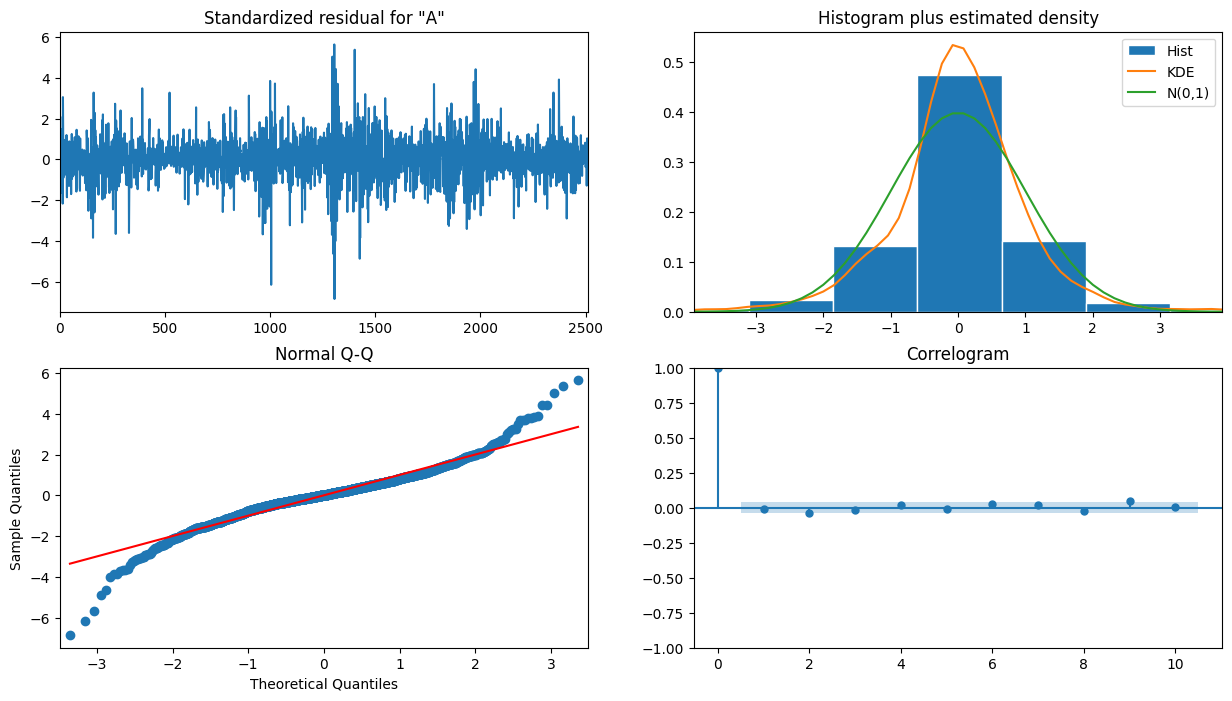

In [21]:
import matplotlib.pyplot as plt

best_model.plot_diagnostics(figsize=(15, 8))
plt.show()


In [22]:
# Forecast next 10 time steps
forecast = model_fit.forecast(steps=10)

print(forecast)


2514    0.002259
2515    0.000970
2516    0.000476
2517    0.000730
2518    0.001499
2519    0.000759
2520    0.000569
2521    0.001358
2522    0.000811
2523    0.000849
Name: predicted_mean, dtype: float64
